<a href="https://colab.research.google.com/github/anurag4667/Minor_2/blob/main/Minor_project_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
dataset = pd.read_csv('Data_final.csv')
dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
prev_y = y

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[-1.32550985,  0.93591557, -1.28353211, ...,  0.92944689,
         1.16192314, -0.45317182],
       [ 1.06705904, -1.54505224, -0.60475509, ...,  1.56779123,
         0.33037224, -0.52708983],
       [-0.84412212, -0.62709415,  2.31826667, ...,  0.73966884,
         0.50741211,  1.11254609],
       ...,
       [-0.36991927,  0.93591557, -0.80655366, ...,  0.48663144,
         0.92586998, -0.90339971],
       [ 0.03243465,  0.1089263 , -0.80655366, ...,  0.92944689,
         1.28531456, -0.75556368],
       [ 0.03243465,  0.1089263 , -0.80655366, ...,  0.73966884,
         1.34432785, -0.75556368]])

In [144]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


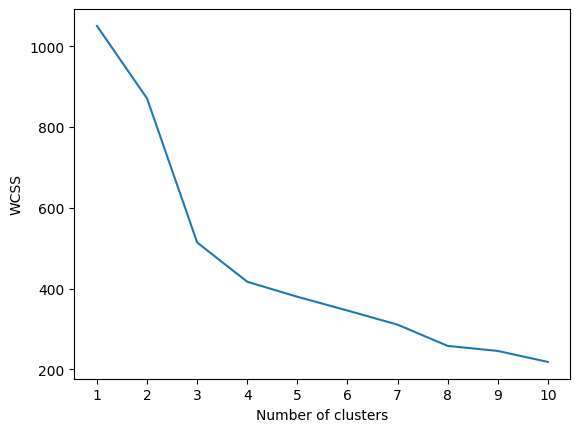

In [145]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [146]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([3, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 2, 0, 2, 3, 2, 3, 1, 3, 2, 2, 3,
       2, 1, 0, 2, 3, 0, 1, 1, 2, 1, 3, 2, 1, 2, 3, 2, 1, 0, 2, 2, 3, 2,
       3, 3, 2, 3, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 3, 2, 1, 3, 2, 2, 3, 2,
       2, 0, 2, 3, 3, 1, 2, 2, 2, 2, 3, 1, 3, 2, 1, 2, 2, 3, 2, 0, 2, 3,
       2, 1, 2, 2, 1, 3, 2, 0, 2, 2, 2, 1, 2, 2, 3, 3, 3], dtype=int32)

In [147]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

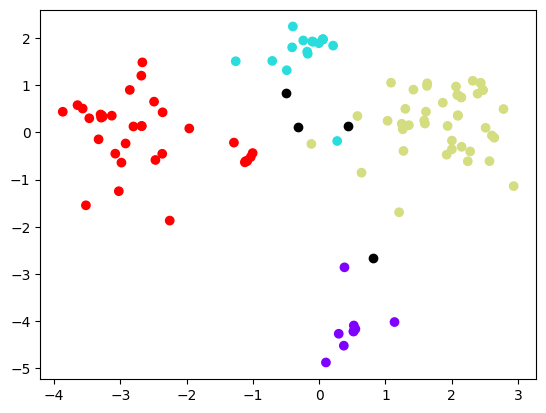

In [148]:
plt.scatter(X[:,0],X[:,1], c = y_pred, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.show()

In [149]:
dataset['Cluster_4'] = y_pred

In [150]:
dataset

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career,Cluster_4
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant,3
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer,3
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson,2
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist,3
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,Teacher,2
...,...,...,...,...,...,...,...,...,...,...,...,...
100,7.67,8.23,6.01,9.12,5.45,4.45,2.89,3.12,4.67,8.34,Foreign Service Officer,2
101,2.67,8.78,7.67,8.45,6.45,4.45,2.89,3.12,4.67,5.45,Customs and Border Protection Officer,2
102,6.78,8.67,4.23,5.23,4.67,8.23,7.67,6.01,7.45,5.45,Civil Engineer,3
103,7.34,7.67,4.23,5.23,4.67,9.34,8.45,6.78,8.12,5.67,Robotics Engineer,3


In [151]:
cluster_means_4 = dataset.drop(columns='Career').groupby('Cluster_4').mean()
cluster_means_4

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning
Cluster_4,,,,,,,,,,
0,8.436667,4.326667,7.881111,7.141111,6.043333,3.522222,3.352222,8.426667,5.141111,4.414444
1,6.608125,8.546875,4.505625,6.388750,5.116875,8.276250,3.597500,4.010000,4.381875,6.881250
2,6.858043,7.688696,6.371087,8.158478,5.965870,4.485435,3.309783,3.942826,4.578043,7.906739
3,7.906765,7.710294,4.310294,5.262059,4.802353,7.447353,6.457353,6.495000,8.060882,5.878529


In [152]:
a = dataset[dataset['Cluster_4'] == 0]['Career'].unique()
b = dataset[dataset['Cluster_4'] == 1]['Career'].unique()
c = dataset[dataset['Cluster_4'] == 2]['Career'].unique()
d = dataset[dataset['Cluster_4'] == 3]['Career'].unique()
print('Cluster_4_1 \n' , a)
print('Cluster_4_2 \n' , b)
print('Cluster_4_3 \n' , c)
print('Cluster_4_4 \n' , d)

Cluster_4_1 
 ['Chef' 'Artist' 'Fashion Designer' 'Event Photographer' 'Musician'
 'Interior Designer' 'Video Game Tester' 'Fashion Stylist' 'Film Director']
Cluster_4_2 
 ['Financial Analyst' 'IT Support Specialist' 'Data Analyst' 'Pharmacist'
 'Financial Planner' 'Software Quality Assurance Tester'
 'Financial Auditor' 'Financial Advisor' 'Airline Pilot'
 'Marketing Analyst' 'Database Administrator' 'Investment Banker'
 'Database Analyst' 'Insurance Underwriter' 'Tax Accountant'
 'Tax Collector']
Cluster_4_3 
 ['Salesperson' 'Teacher' 'Nurse' 'Psychologist' 'Marketing Manager'
 'Physician' 'Human Resources Manager' 'Journalist' 'Event Planner'
 'Real Estate Agent' 'Lawyer' 'Marketing Coordinator' 'Social Worker'
 'HR Recruiter' 'Elementary School Teacher' 'Market Research Analyst'
 'Police Detective' 'Marketing Copywriter' 'Speech Therapist'
 'Social Media Manager' 'Web Developer' 'Physical Therapist'
 'Dental Hygienist' 'Pediatric Nurse' 'Advertising Executive'
 'IT Project Manager'

In [124]:
data = np.array([[8, 7, 8, 9, 8, 9, 9, 9, 9,9]])
scaled_data = scaler.transform(data)

In [125]:
cl = kmeans.predict(scaled_data)[0]

dataset[dataset['Cluster_4'] == cl]['Career'].unique()

array(['Accountant', 'Graphic Designer', 'Research Scientist',
       'Architect', 'Software Developer', 'Construction Engineer',
       'Astronomer', 'Biologist', 'Environmental Scientist',
       'Biomedical Engineer', 'Biotechnologist', 'Industrial Engineer',
       'Zoologist', 'Mechanical Engineer', 'Forensic Scientist',
       'Geologist', 'Wildlife Biologist', 'Air Traffic Controller',
       'Game Developer', 'Urban Planner', 'Environmental Engineer',
       'Mechanical Designer', 'Aerospace Engineer',
       'Wildlife Conservationist', 'Biomedical Researcher',
       'Electrical Engineer', 'Marine Biologist', 'Forensic Psychologist',
       'Public Health Analyst', 'Quality Control Inspector',
       'Civil Engineer', 'Robotics Engineer',
       'Electronics Design Engineer'], dtype=object)

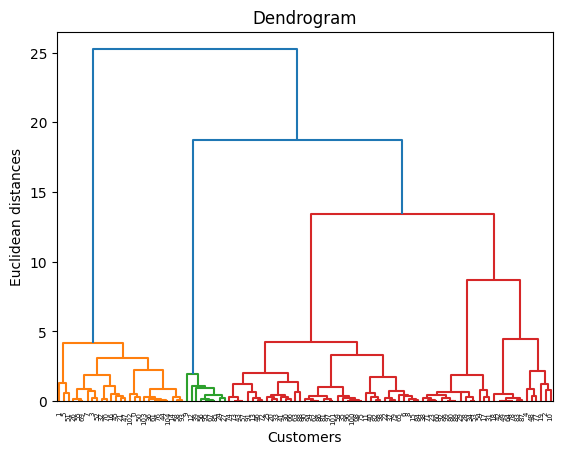

In [153]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [154]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([3, 3, 0, 3, 0, 3, 1, 3, 1, 2, 0, 1, 2, 1, 3, 1, 3, 0, 0, 0, 1, 3,
       1, 0, 2, 1, 3, 2, 0, 0, 1, 0, 3, 1, 0, 1, 3, 1, 0, 2, 1, 1, 0, 1,
       3, 3, 1, 3, 0, 0, 3, 3, 3, 0, 0, 3, 2, 1, 3, 1, 0, 3, 1, 1, 0, 1,
       1, 2, 1, 3, 3, 0, 1, 1, 1, 1, 3, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0,
       1, 0, 1, 1, 0, 3, 1, 2, 1, 1, 1, 0, 1, 1, 3, 3, 3])

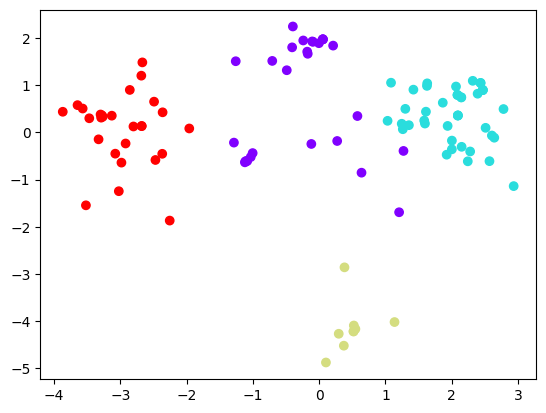

In [155]:
plt.scatter(X[:,0], X[:,1],  c = hc.labels_, cmap = 'rainbow')
plt.show()

In [156]:
dataset2 = dataset
dataset2['Cluster_4'] = y_hc

In [157]:
cluster_means_4 = dataset2.drop(columns='Career').groupby('Cluster_4').mean()
cluster_means_4

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning
Cluster_4,,,,,,,,,,
0,7.190357,8.072143,5.013214,6.285000,5.320357,6.966071,3.769643,4.940000,5.712857,7.208214
1,6.861707,7.761220,6.223415,8.260976,6.066585,4.424634,3.240976,3.742927,4.374146,7.897561
2,8.436667,4.326667,7.881111,7.141111,6.043333,3.522222,3.352222,8.426667,5.141111,4.414444
3,7.680370,7.716667,4.302963,5.249630,4.514074,7.981481,7.071481,6.465926,7.980370,5.483333


In [158]:
a = dataset2[dataset2['Cluster_4'] == 0]['Career'].unique()
b = dataset2[dataset2['Cluster_4'] == 1]['Career'].unique()
c = dataset2[dataset2['Cluster_4'] == 2]['Career'].unique()
d = dataset2[dataset2['Cluster_4'] == 3]['Career'].unique()
print('Cluster_4_1 \n' , a)
print('Cluster_4_2 \n' , b)
print('Cluster_4_3 \n' , c)
print('Cluster_4_4 \n' , d)

Cluster_4_1 
 ['Salesperson' 'Teacher' 'Marketing Manager' 'Financial Analyst'
 'Biologist' 'Event Planner' 'IT Support Specialist' 'Data Analyst'
 'Pharmacist' 'Financial Planner' 'Software Quality Assurance Tester'
 'Financial Auditor' 'Zoologist' 'Web Developer' 'Wildlife Biologist'
 'Financial Advisor' 'Airline Pilot' 'Marketing Analyst'
 'Wildlife Conservationist' 'Database Administrator' 'Investment Banker'
 'Marine Biologist' 'Database Analyst' 'Forensic Psychologist'
 'Public Health Analyst' 'Insurance Underwriter' 'Tax Accountant'
 'Tax Collector']
Cluster_4_2 
 ['Nurse' 'Psychologist' 'Physician' 'Human Resources Manager' 'Journalist'
 'Real Estate Agent' 'Lawyer' 'Marketing Coordinator' 'Social Worker'
 'HR Recruiter' 'Elementary School Teacher' 'Market Research Analyst'
 'Police Detective' 'Marketing Copywriter' 'Speech Therapist'
 'Social Media Manager' 'Physical Therapist' 'Dental Hygienist'
 'Pediatric Nurse' 'Advertising Executive' 'IT Project Manager'
 'Forestry Techni

In [177]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7)
dbscan.fit(X)

DBSCAN(eps=0.7)

In [178]:
dbscan.labels_


array([ 0, -1, -1,  0,  1, -1,  1,  0,  1, -1,  1,  1,  4,  1,  0,  1,  0,
        2,  3, -1,  1,  0,  1,  2,  4,  1,  0,  4,  2,  2,  1,  2,  0,  1,
        2,  1,  0,  1,  2,  4,  1,  1,  3,  1,  0,  0,  1,  0, -1,  3,  0,
        0,  0,  2,  2,  0,  4,  1,  0,  1,  2,  0,  1,  1,  3,  1,  1,  4,
        1,  0,  0,  2,  1,  1,  1,  1,  0, -1,  3,  1,  2,  1,  1,  3,  1,
        4,  1,  3,  1,  2,  1,  1,  2,  0,  1,  4,  1,  1,  1,  2,  1,  1,
        0,  0,  0])

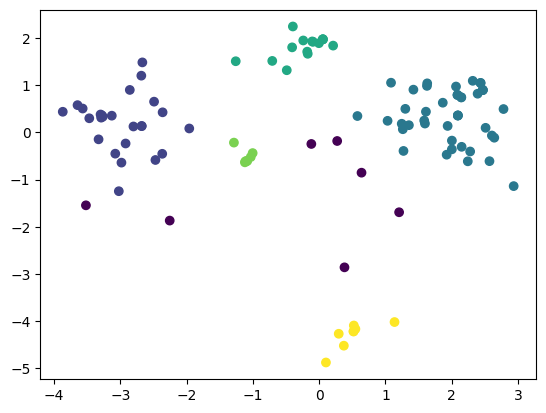

In [179]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)

In [182]:
dataset3 = dataset.drop(columns='Cluster_4')
dataset3['Clusters'] = dbscan.labels_



In [185]:
dataset3

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career,Clusters
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant,0
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer,-1
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson,-1
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist,0
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,Teacher,1
...,...,...,...,...,...,...,...,...,...,...,...,...
100,7.67,8.23,6.01,9.12,5.45,4.45,2.89,3.12,4.67,8.34,Foreign Service Officer,1
101,2.67,8.78,7.67,8.45,6.45,4.45,2.89,3.12,4.67,5.45,Customs and Border Protection Officer,1
102,6.78,8.67,4.23,5.23,4.67,8.23,7.67,6.01,7.45,5.45,Civil Engineer,0
103,7.34,7.67,4.23,5.23,4.67,9.34,8.45,6.78,8.12,5.67,Robotics Engineer,0


In [186]:
a = dataset3[dataset3['Clusters'] == 0]['Career'].unique()
b = dataset3[dataset3['Clusters'] == 1]['Career'].unique()
c = dataset3[dataset3['Clusters'] == 2]['Career'].unique()
d = dataset3[dataset3['Clusters'] == 3]['Career'].unique()
e = dataset3[dataset3['Clusters'] == 4]['Career'].unique()
print('Cluster_1 \n' , a)
print('Cluster_2 \n' , b)
print('Cluster_3 \n' , c)
print('Cluster_4 \n' , d)
print('Cluster_5 \n' , e)

Cluster_1 
 ['Accountant' 'Research Scientist' 'Software Developer'
 'Construction Engineer' 'Astronomer' 'Environmental Scientist'
 'Biomedical Engineer' 'Biotechnologist' 'Industrial Engineer'
 'Mechanical Engineer' 'Forensic Scientist' 'Geologist'
 'Air Traffic Controller' 'Game Developer' 'Urban Planner'
 'Environmental Engineer' 'Mechanical Designer' 'Aerospace Engineer'
 'Biomedical Researcher' 'Electrical Engineer' 'Quality Control Inspector'
 'Civil Engineer' 'Robotics Engineer' 'Electronics Design Engineer']
Cluster_2 
 ['Teacher' 'Nurse' 'Psychologist' 'Marketing Manager' 'Physician'
 'Human Resources Manager' 'Journalist' 'Real Estate Agent' 'Lawyer'
 'Marketing Coordinator' 'Social Worker' 'HR Recruiter'
 'Elementary School Teacher' 'Market Research Analyst' 'Police Detective'
 'Marketing Copywriter' 'Speech Therapist' 'Social Media Manager'
 'Physical Therapist' 'Dental Hygienist' 'Pediatric Nurse'
 'Advertising Executive' 'IT Project Manager' 'Forestry Technician'
 'Marri

In [187]:
cluster_means = dataset3.drop(columns='Career').groupby('Clusters').mean()
cluster_means

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning
Clusters,,,,,,,,,,
-1,7.528571,6.847143,7.211429,6.577143,5.022857,5.307143,5.134286,6.638571,6.211429,6.181429
0,7.605600,7.826800,4.251200,5.193600,4.523600,8.157200,6.934400,6.360800,8.009600,5.512400
1,6.837442,7.746744,6.270000,8.262093,6.014651,4.462093,3.284419,3.822326,4.444884,7.915349
2,6.566667,8.568000,4.228000,6.384667,5.057333,8.316667,3.555333,3.973333,4.332667,6.976667
3,8.780000,7.685714,4.338571,5.310000,5.914286,5.387143,4.088571,6.607143,8.371429,7.402857
4,8.643750,4.061250,7.810000,7.075000,6.228750,3.531250,3.381250,8.312500,5.325000,4.437500
